In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/wp-glbe/wp_glbe.csv
/kaggle/input/wrp-reg/regional.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
import base64

In [3]:
wrp_reg = pd.read_csv('../input/wrp-reg/regional.csv')

In [4]:
wrp_reg

,year,region,christianity_protestant,christianity_romancatholic,christianity_easternorthodox,christianity_anglican,christianity_other,christianity_all,judaism_orthodox,judaism_conservative,...,taoism_percent,jainism_percent,confucianism_percent,syncretism_percent,animism_percent,noreligion_percent,otherreligion_percent,religion_sumpercent,total_percent,worldpopulation_percent
0,1945,Africa,2074180,672337,7251492,419457,4170594,14588060,0,0,...,0.0000,0.0000,0.0000,0.0000,0.3151,0.0003,0.0014,0.9997,1.0000,0.0180
1,1945,Asia,2407144,2222908,181928,3142204,1964907,9919091,0,0,...,0.0002,0.0000,0.0000,0.6378,0.0340,0.0462,0.0002,1.0043,1.0505,0.4103
2,1945,Europe,83145512,216041422,86503645,29855595,5361826,420908000,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0023,0.1780,0.0045,0.8220,1.0000,0.3468
3,1945,Mideast,87174,635929,3180260,0,108332,4011695,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0073,1.0000,1.0000,0.0403
4,1945,West. Hem,73173575,171759439,1383846,3537777,2068807,251923444,856827,1426350,...,0.0000,0.0000,0.0000,0.0190,0.0008,0.0795,0.0230,0.9377,1.0172,0.1790
5,1950,Africa,3302860,736193,7260770,609769,4884121,16793713,0,0,...,0.0000,0.0000,0.0000,0.0000,0.3288,0.0006,0.0001,0.9994,1.0000,0.0151
6,1950,Asia,9360004,25948053,1051829,3612715,5190796,45163397,0,0,...,0.0007,0.0014,0.0020,0.3274,0.0585,0.0532,0.0004,0.9791,1.0324,0.5828
7,1950,Europe,40293475,182146023,91004796,29739026,4534844,347718164,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0025,0.2071,0.0011,0.7929,1.0000,0.2181
8,1950,Mideast,27091,946089,4047536,0,93138,5113854,1090162,6607,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0180,1.0000,1.0000,0.0348
9,1950,West. Hem,80317613,192159498,3245980,4346034,1621869,281690994,1114069,1853690,...,0.0000,0.0000,0.0000,0.0194,0.0014,0.0711,0.0302,0.9456,1.0168,0.1445


In [5]:
wrp_reg.head(3)

,year,region,christianity_protestant,christianity_romancatholic,christianity_easternorthodox,christianity_anglican,christianity_other,christianity_all,judaism_orthodox,judaism_conservative,...,taoism_percent,jainism_percent,confucianism_percent,syncretism_percent,animism_percent,noreligion_percent,otherreligion_percent,religion_sumpercent,total_percent,worldpopulation_percent
0,1945,Africa,2074180,672337,7251492,419457,4170594,14588060,0,0,...,0.0000,0.0,0.0,0.0000,0.3151,0.0003,0.0014,0.9997,1.0000,0.0180
1,1945,Asia,2407144,2222908,181928,3142204,1964907,9919091,0,0,...,0.0002,0.0,0.0,0.6378,0.0340,0.0462,0.0002,1.0043,1.0505,0.4103
2,1945,Europe,83145512,216041422,86503645,29855595,5361826,420908000,0,0,...,0.0000,0.0,0.0,0.0000,0.0023,0.1780,0.0045,0.8220,1.0000,0.3468


In [6]:
print(wrp_reg['region'].unique())

['Africa' 'Asia' 'Europe' 'Mideast' 'West. Hem']


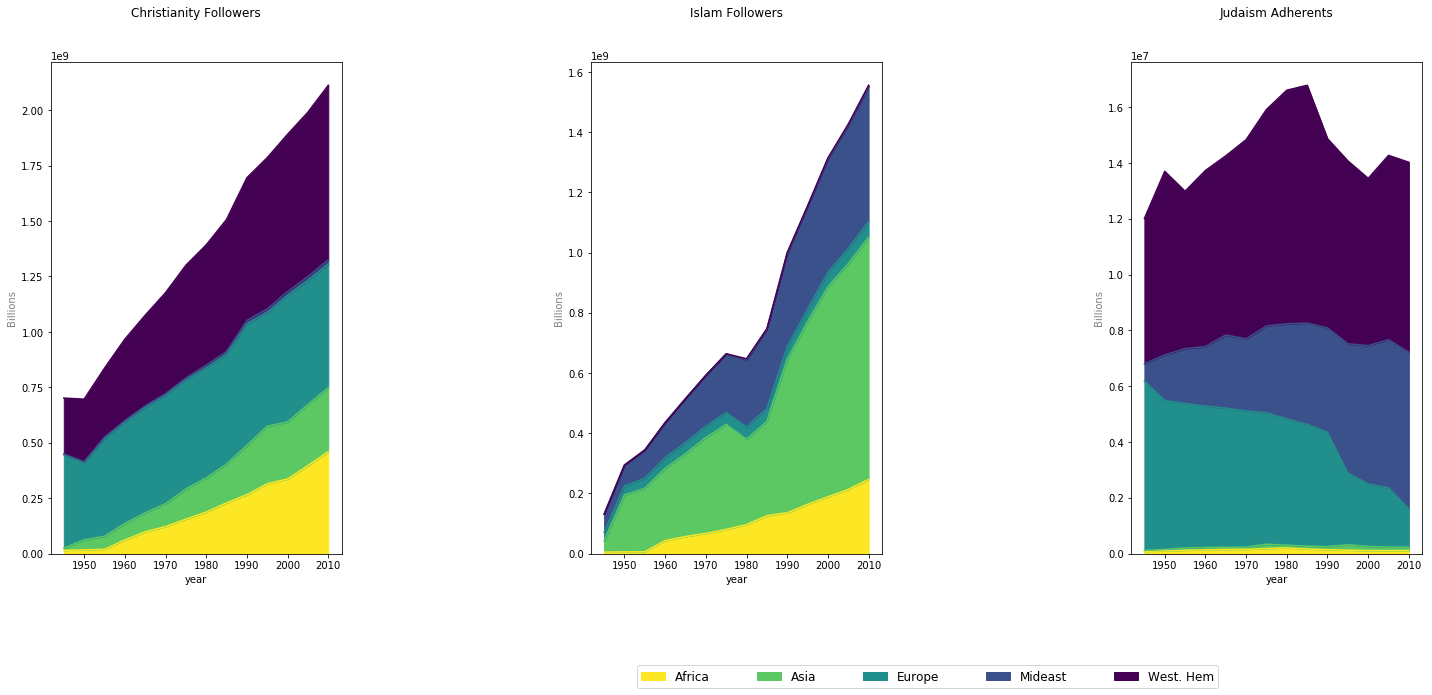

In [7]:
#fig = plt.figure(figsize=(10, 8))
fig, axes = plt.subplots(nrows=1, ncols=3)
colormap = plt.cm.viridis_r
# fig = plt.figure(figsize=(20, 10))
# plt.subplot(1)
christianity_year = wrp_reg.groupby(['year','region']).christianity_all.sum()
christianity_year.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False,ax= axes[0],figsize=(20,10) , legend=False)
axes[0].set_title('Christianity Followers',y=1.08,size=12)
axes[0].set_ylabel('Billions', color='gray')

# plt.subplot(2)
islam_year = wrp_reg.groupby(['year','region']).islam_all.sum()
islam_year.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[1], legend= False)
axes[1].set_title('Islam Followers',y=1.08,size=12)
axes[1].set_ylabel('Billions', color='gray')

# plt.subplot(3)
judaism_year = wrp_reg.groupby(['year','region']).judaism_all.sum()
judaism_year.unstack().plot(kind='area',stacked=True,  colormap= colormap , grid=False, ax= axes[2])
axes[2].legend(bbox_to_anchor=(-1.7, -0.3, 2, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)
axes[2].set_title('Judaism Adherents',y=1.08,size=12)
axes[2].set_ylabel('Billions', color='gray')

plt.tight_layout()
plt.show()

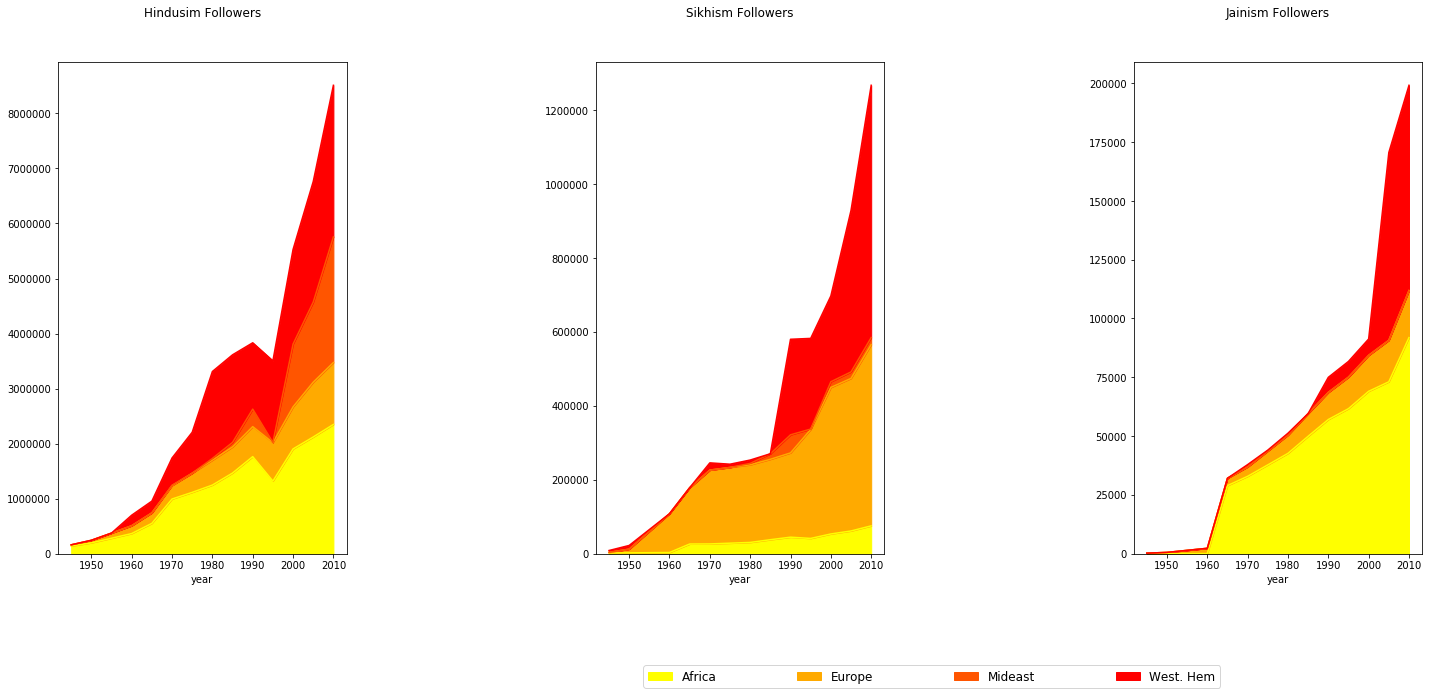

In [8]:
#fig = plt.figure(figsize=(10, 8))
fig, axes = plt.subplots(nrows=1, ncols=3)
colormap = plt.cm.autumn_r
# fig = plt.figure(figsize=(20, 10))
# plt.subplot(1)
hinduism_year = wrp_reg[wrp_reg['region'] != 'Asia'].groupby(['year','region']).hinduism_all.sum()
hinduism_year.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False,ax= axes[0],figsize=(20,10) , legend=False)
axes[0].set_title('Hindusim Followers',y=1.08,size=12)

# plt.subplot(2)
sikhism_year = wrp_reg[wrp_reg['region'] != 'Asia'].groupby(['year','region']).sikhism_all.sum()
sikhism_year.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[1], legend= False)
axes[1].set_title('Sikhism Followers',y=1.08,size=12)

# plt.subplot(3)
jainism_year = wrp_reg[wrp_reg['region'] != 'Asia'].groupby(['year','region']).jainism_all.sum()
jainism_year.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[2])
axes[2].legend(bbox_to_anchor=(-1.7, -0.3, 2, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)
axes[2].set_title('Jainism Followers',y=1.08,size=12)

plt.tight_layout()
plt.show()

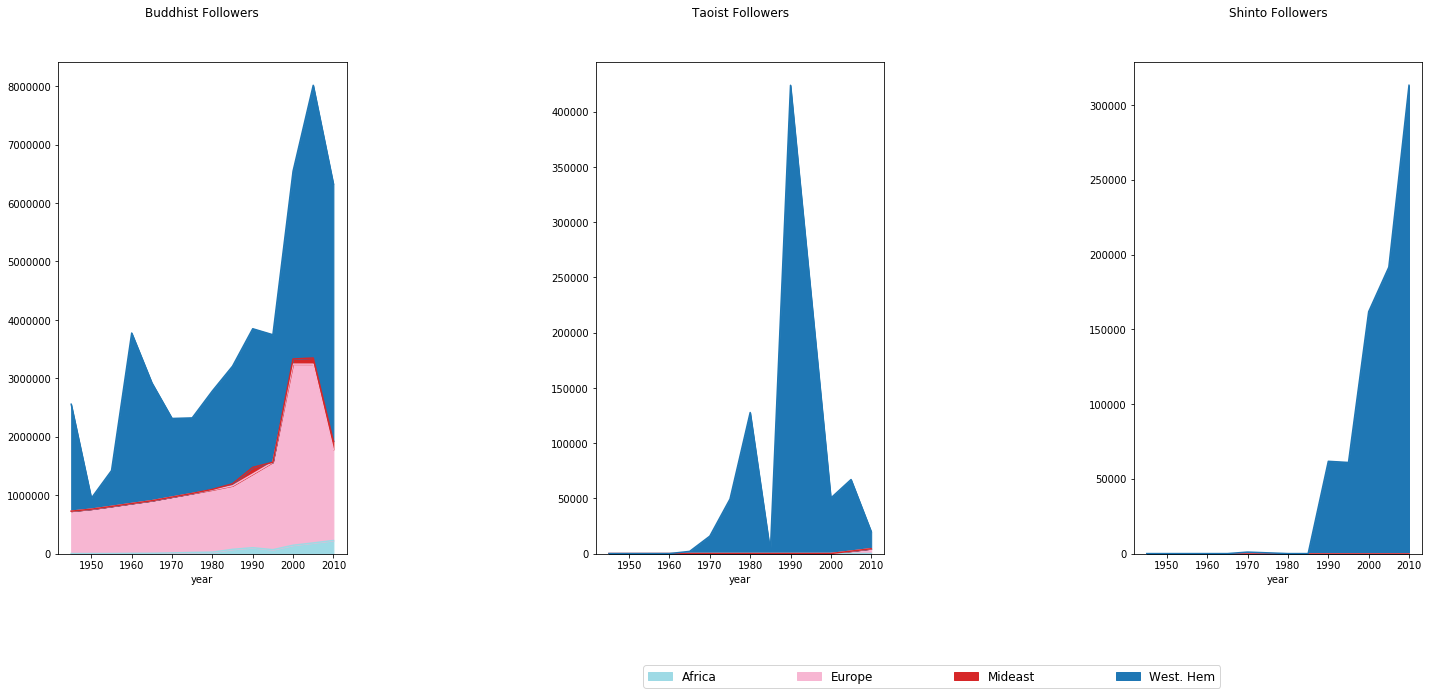

In [9]:
#fig = plt.figure(figsize=(8, 5))
fig, axes = plt.subplots(nrows=1, ncols=3)
colormap = plt.cm.tab20_r
# fig = plt.figure(figsize=(20, 10))
# plt.subplot(1)
buddhist_year = wrp_reg[wrp_reg['region'] != 'Asia'].groupby(['year','region']).buddhism_all.sum()
buddhist_year.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False,ax= axes[0],figsize=(20,10) , legend=False)
axes[0].set_title('Buddhist Followers',y=1.08,size=12)

# plt.subplot(2)
taoism_year = wrp_reg[wrp_reg['region'] != 'Asia'].groupby(['year','region']).taoism_all.sum()
taoism_year.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[1], legend= False)
axes[1].set_title('Taoist Followers',y=1.08,size=12)

# plt.subplot(3)
shinto_year = wrp_reg[wrp_reg['region'] != 'Asia'].groupby(['year','region']).shinto_all.sum()
shinto_year.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[2])
axes[2].legend(bbox_to_anchor=(-1.7, -0.3, 2, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)
axes[2].set_title('Shinto Followers',y=1.08,size=12)

plt.tight_layout()
plt.show()

In [10]:
wrp_glbe = pd.read_csv('../input/wp-glbe/wp_glbe.csv')